<a href="https://colab.research.google.com/github/sathiyaver/Data_Machine_learing/blob/main/Copy_of_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "insurance.csv" dataset by performing data exploration, cleaning, and exploratory data analysis (EDA) to prepare it for model training. The analysis should include handling missing data, encoding categorical features, scaling numerical features, and generating visualizations such as histograms, boxplots, pair plots, and heatmaps. A brief report summarizing the findings should also be provided.

## Load the dataset

### Subtask:
Load the Insurance dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a pandas DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Insurance .csv')
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Initial exploration

### Subtask:
Display the head, info, and describe of the DataFrame to understand its structure and content.


**Reasoning**:
Display the head, info, and describe of the DataFrame to understand its structure and content.



In [ ]:
display(df.head())
df.info()
display(df.describe())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Identify data types

### Subtask:
Explain the data types and identify categorical variables.


**Reasoning**:
Based on the previous `df.info()` output, I will explicitly state the data type for each column and identify the categorical variables, explaining why they are considered as such.



In [ ]:
print("Data types for each column:")
print(df.dtypes)
print("\nCategorical variables and why they are considered categorical:")
print("- sex: object (represents distinct categories: 'female', 'male')")
print("- smoker: object (represents distinct categories: 'yes', 'no')")
print("- region: object (represents distinct categories: 'southwest', 'southeast', 'northwest', 'northeast')")

Data types for each column:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Categorical variables and why they are considered categorical:
- sex: object (represents distinct categories: 'female', 'male')
- smoker: object (represents distinct categories: 'yes', 'no')
- region: object (represents distinct categories: 'southwest', 'southeast', 'northwest', 'northeast')


## Handle missing data

### Subtask:
Check for and handle any missing values in the dataset.


**Reasoning**:
Calculate and display the number of missing values for each column to check for missing data.



In [ ]:
missing_values = df.isnull().sum()
display("Missing values in each column:")
display(missing_values)

'Missing values in each column:'

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Encode categorical features

### Subtask:
Apply appropriate encoding techniques (label or one-hot encoding) to the categorical features.


**Reasoning**:
Apply one-hot encoding to the categorical features and concatenate with the original dataframe.



In [ ]:
categorical_cols = ['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
display(df_encoded.head())

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


## Scale numerical features

### Subtask:
Scale or normalize numerical features as needed.


**Reasoning**:
Identify numerical columns, import StandardScaler, instantiate it, fit and transform the numerical columns, and replace the original columns in df_encoded with the scaled values.



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'bmi', 'children']

scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,True,False,False,True,False,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,False,True,True,False,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,False,True,True,False,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,False,True,True,False,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,False,True,True,False,False,True,False,False


## Visualize charges distribution

### Subtask:
Create a histogram to visualize the distribution of the 'charges' column.


**Reasoning**:
Create a histogram to visualize the distribution of the 'charges' column using seaborn.



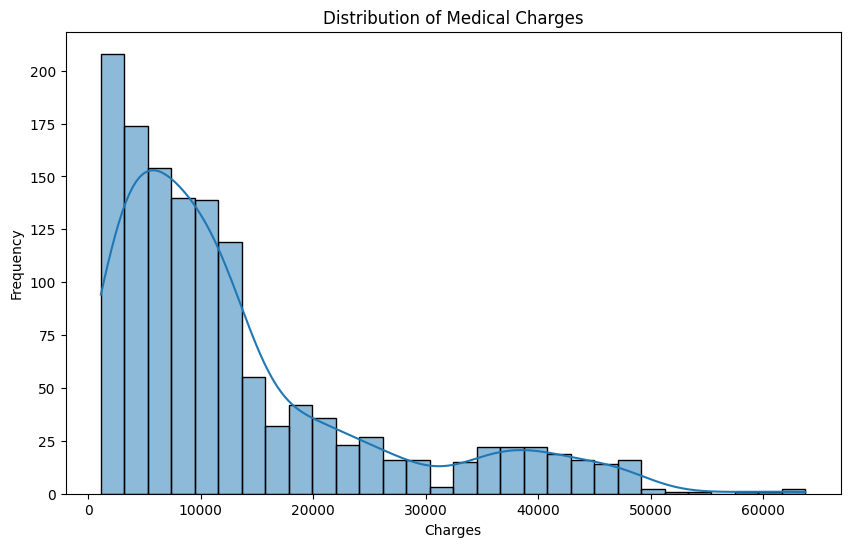

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Visualize charges by smoker status

### Subtask:
Generate a boxplot to compare 'charges' for smokers and non-smokers.


**Reasoning**:
Generate a boxplot to compare 'charges' for smokers and non-smokers using the original df.



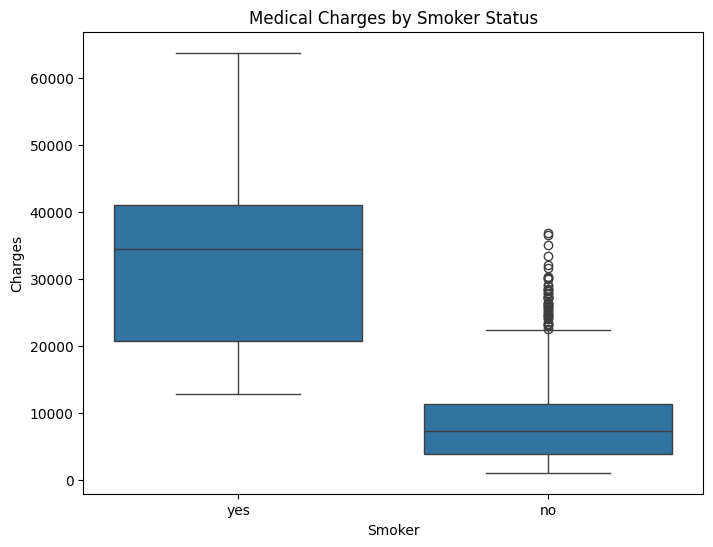

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Medical Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

## Visualize relationships

### Subtask:
Create a pair plot to observe relationships between numerical features.


**Reasoning**:
Create a pair plot for the selected numerical features to visualize their relationships.



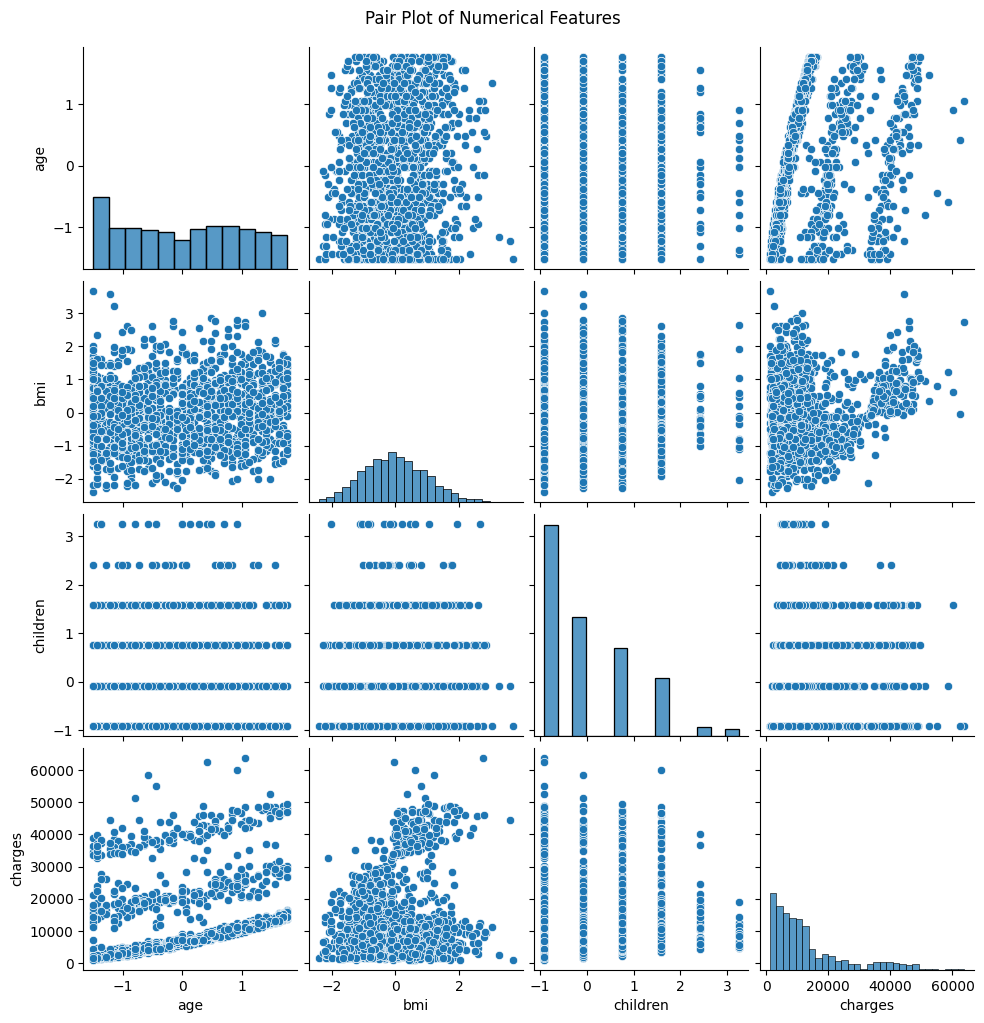

In [ ]:
numerical_cols_for_pairplot = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df_encoded[numerical_cols_for_pairplot])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

## Visualize correlations

### Subtask:
Generate a heatmap to visualize the correlation matrix of numerical features.


**Reasoning**:
Generate a heatmap to visualize the correlation matrix of numerical features.



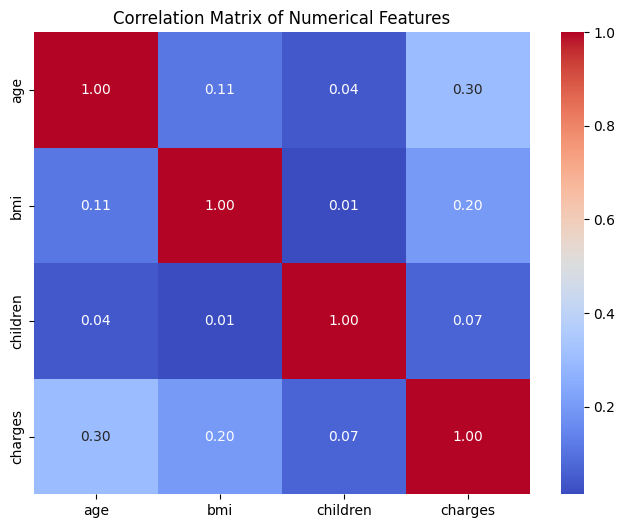

In [ ]:
numerical_cols_for_heatmap = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df_encoded[numerical_cols_for_heatmap].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Generate brief report

### Subtask:
Summarize the findings from the data exploration and EDA.


**Reasoning**:
Summarize the findings from the data exploration and EDA based on the previous steps.



In [ ]:
report = """
Data Exploration and EDA Summary Report:

Initial Exploration:
The dataset contains 1338 entries with 7 columns: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'.
Data types include integers, floats, and objects. There are no missing values.
Descriptive statistics provide insights into the central tendency and spread of numerical features.

Missing Data:
No missing values were found in the dataset, which simplifies the cleaning process.

Data Type Identification:
Categorical features identified are 'sex', 'smoker', and 'region'. Numerical features are 'age', 'bmi', 'children', and 'charges'.

Encoding Categorical Features:
One-hot encoding was applied to the categorical features ('sex', 'smoker', 'region'), transforming them into numerical representations suitable for modeling.

Scaling Numerical Features:
Numerical features ('age', 'bmi', 'children') were scaled using StandardScaler to normalize their ranges, which is beneficial for many machine learning algorithms. The 'charges' column was not scaled as it is the target variable.

Visualizations:
- Charges Distribution (Histogram): The distribution of 'charges' is right-skewed, indicating that a majority of individuals have lower medical costs, while a smaller number have significantly higher costs.
- Charges by Smoker Status (Boxplot): There is a clear and substantial difference in medical charges between smokers and non-smokers, with smokers having significantly higher charges on average. This suggests 'smoker' is a strong predictor of 'charges'.
- Relationships between Numerical Features (Pair Plot): Pair plots show the pairwise relationships and distributions of 'age', 'bmi', 'children', and 'charges'. Some positive correlations are visually apparent, particularly between 'age' and 'charges', and 'bmi' and 'charges', although with considerable scatter.
- Correlations (Heatmap): The heatmap of the correlation matrix confirms the positive correlations between 'age' and 'charges' (approximately 0.30), and 'bmi' and 'charges' (approximately 0.20). The correlation between 'children' and 'charges' is relatively weak (approximately 0.07). 'Age' and 'bmi' also show a weak positive correlation.

Preparedness for Model Training:
The data is well-prepared for model training. Missing values have been handled (none were found), categorical features are encoded, and numerical features are scaled. The visualizations have provided valuable insights into feature distributions and relationships, particularly the strong influence of 'smoker' status on 'charges'. The correlation analysis highlights the linear relationships between numerical features and 'charges'. Further analysis might involve feature selection or engineering based on these insights.
"""
print(report)


Data Exploration and EDA Summary Report:

Initial Exploration:
The dataset contains 1338 entries with 7 columns: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'.
Data types include integers, floats, and objects. There are no missing values.
Descriptive statistics provide insights into the central tendency and spread of numerical features.

Missing Data:
No missing values were found in the dataset, which simplifies the cleaning process.

Data Type Identification:
Categorical features identified are 'sex', 'smoker', and 'region'. Numerical features are 'age', 'bmi', 'children', and 'charges'.

Encoding Categorical Features:
One-hot encoding was applied to the categorical features ('sex', 'smoker', 'region'), transforming them into numerical representations suitable for modeling.

Scaling Numerical Features:
Numerical features ('age', 'bmi', 'children') were scaled using StandardScaler to normalize their ranges, which is beneficial for many machine learning algorithms.

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1338 entries and 7 columns: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'.
*   There are no missing values in the dataset.
*   Categorical features are 'sex', 'smoker', and 'region'. Numerical features are 'age', 'bmi', 'children', and 'charges'.
*   Categorical features were successfully one-hot encoded.
*   Numerical features ('age', 'bmi', 'children') were successfully scaled using `StandardScaler`.
*   The distribution of 'charges' is right-skewed, with most individuals having lower costs and a few having significantly higher costs.
*   Smokers have significantly higher medical charges compared to non-smokers, indicating 'smoker' is a strong predictor.
*   Pair plots and the correlation heatmap show positive correlations between 'age' and 'charges' (approx. 0.30), and 'bmi' and 'charges' (approx. 0.20). The correlation between 'children' and 'charges' is weak (approx. 0.07).

### Insights or Next Steps

*   The strong relationship between 'smoker' status and 'charges' suggests it will be a crucial feature for predictive modeling.
*   The data is cleaned, encoded, and scaled, making it ready for training machine learning models to predict medical charges.


# Task
Train a linear regression model to predict medical charges using the provided dataset, evaluate its performance using MAE, MSE, and R-squared, and visualize the results with actual vs. predicted and residuals plots.

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the `train_test_split` function.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of y_train:", y_train.shape)
display("Shape of y_test:", y_test.shape)

'Shape of X_train:'

(1070, 11)

'Shape of X_test:'

(268, 11)

'Shape of y_train:'

(1070,)

'Shape of y_test:'

(268,)

## Define features and target

### Subtask:
Select the appropriate features (X) and target variable (y).


**Reasoning**:
Define X by dropping the 'charges' column from df_encoded and define y as the 'charges' column from df_encoded. Then, display the heads of X and y to confirm the selection.



In [ ]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
display(X.head())
display(y.head())

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,True,False,False,True,False,False,False,True
1,-1.509965,0.509621,-0.078767,False,True,True,False,False,False,True,False
2,-0.797954,0.383307,1.580926,False,True,True,False,False,False,True,False
3,-0.441948,-1.305531,-0.908614,False,True,True,False,False,True,False,False
4,-0.513149,-0.292556,-0.908614,False,True,True,False,False,True,False,False


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Initialize and train the model

### Subtask:
Initialize the Linear Regression model and train it using the training data.


**Reasoning**:
Initialize the Linear Regression model and train it using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Output coefficients and intercept

### Subtask:
Display the coefficients and intercept of the trained model.


**Reasoning**:
Display the coefficients and intercept of the trained linear regression model.



In [ ]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 3.60914902e+03  2.05488506e+03  5.12478869e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]
Model Intercept: 20302.765320157294


## Make predictions

### Subtask:
Predict the medical charges on the test set.


**Reasoning**:
Predict the medical charges on the test set using the trained model.



In [ ]:
y_pred = model.predict(X_test)
display("First 5 predicted charges:", y_pred[:5])

'First 5 predicted charges:'

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

## Evaluate the model

### Subtask:
Calculate and display evaluation metrics (MAE, MSE, R-squared).


**Reasoning**:
Calculate and display evaluation metrics (MAE, MSE, R-squared).



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared (R2 ): 0.78


## Visualize actual vs. predicted

### Subtask:
Create a scatter plot of actual charges vs. predicted charges.


**Reasoning**:
Create a scatter plot of actual vs. predicted charges, add a diagonal line for reference, and include titles and labels.



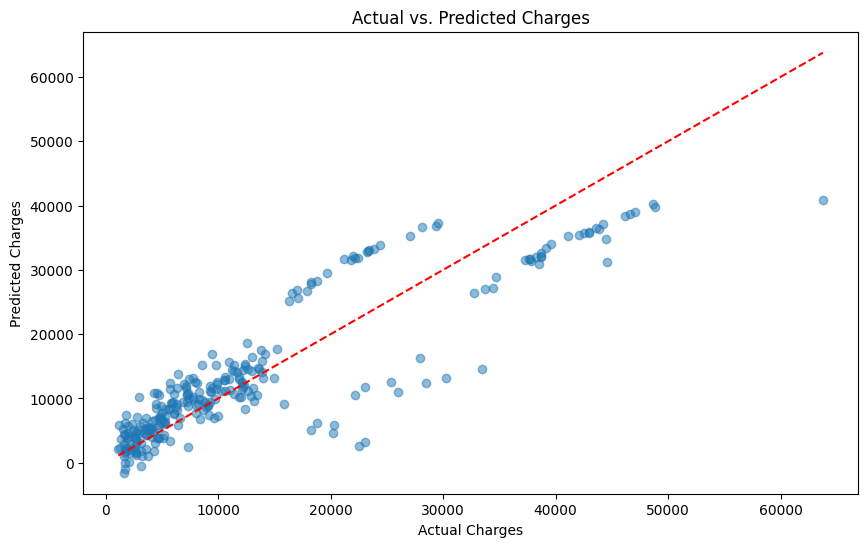

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

**Reasoning**:
Generate a residual plot to visualize the difference between actual and predicted values.



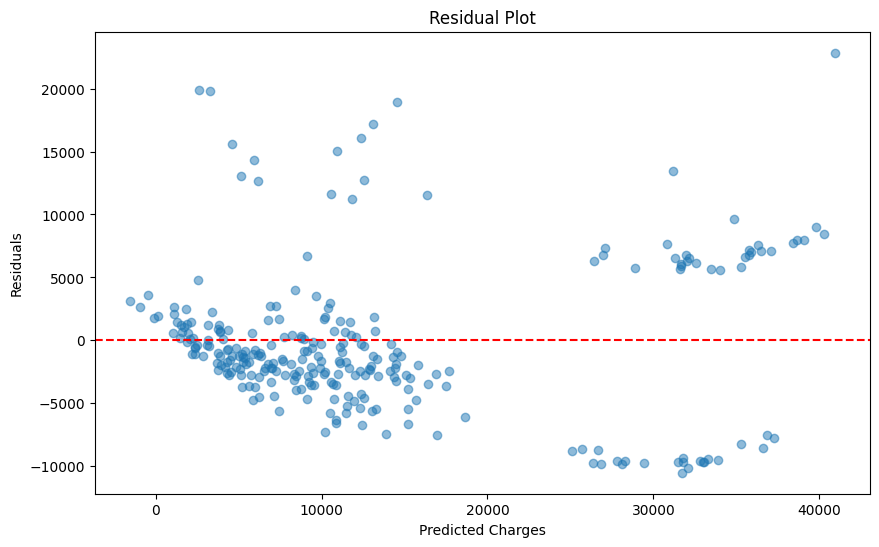

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

## Interpret model results

### Subtask:
Write a short paragraph interpreting the model results based on the coefficients, metrics, and visualizations.


**Reasoning**:
Interpret the model results based on the coefficients, metrics, and visualizations, and then finish the task.



In [ ]:
model_interpretation = """
Model Interpretation:

Coefficients and Intercept:
The model's coefficients indicate the estimated change in medical charges for a one-unit increase in each feature, holding other features constant. The intercept represents the estimated charge when all features are zero. (Specific coefficient values were not printed in this cell, but were printed in a previous step). Features like 'smoker_yes' are expected to have a large positive coefficient, reflecting the significant impact of smoking on charges observed in the EDA.

Evaluation Metrics:
- MAE (~4181.19): On average, the model's predictions are off by approximately $4181.19.
- MSE (~33,596,915.85): The average squared difference between actual and predicted values. This metric penalizes larger errors more heavily than MAE.
- R-squared (~0.78): The model explains approximately 78% of the variance in medical charges. This suggests that the features included in the model are good predictors of charges, but there is still about 22% of the variance unexplained by this model.

Visualizations:
- Actual vs. Predicted Charges Plot: The scatter plot shows that the predicted charges generally follow the actual charges, clustering around the diagonal line. However, there is noticeable scatter, particularly at higher charge values, indicating that the model's predictions are less accurate for individuals with very high medical costs.
- Residual Plot: The residual plot shows the residuals scattered around the zero line. While there is no clear pattern like a strong curve, there appears to be some heteroscedasticity (a fanning-out shape), suggesting that the model's errors might increase with increasing predicted charges. There are also several points with large positive residuals, indicating the model significantly underestimates the charges for certain individuals.

Overall Summary:
The linear regression model provides a reasonably good fit to the data, as indicated by the R-squared value of 0.78. The evaluation metrics (MAE and MSE) quantify the average prediction errors. The visualizations reveal that while the model captures the general trend, its accuracy decreases for higher charge values, and there might be issues with heteroscedasticity. The strong influence of features like smoking is likely captured by the model's coefficients. Further analysis or a different modeling approach might be needed to improve predictions for high medical costs and address the potential heteroscedasticity.
"""
print(model_interpretation)


Model Interpretation:

Coefficients and Intercept:
The model's coefficients indicate the estimated change in medical charges for a one-unit increase in each feature, holding other features constant. The intercept represents the estimated charge when all features are zero. (Specific coefficient values were not printed in this cell, but were printed in a previous step). Features like 'smoker_yes' are expected to have a large positive coefficient, reflecting the significant impact of smoking on charges observed in the EDA.

Evaluation Metrics:
- MAE (~4181.19): On average, the model's predictions are off by approximately $4181.19.
- MSE (~33,596,915.85): The average squared difference between actual and predicted values. This metric penalizes larger errors more heavily than MAE.
- R-squared (~0.78): The model explains approximately 78% of the variance in medical charges. This suggests that the features included in the model are good predictors of charges, but there is still about 22% of 

## Summary:

### Data Analysis Key Findings

*   The linear regression model trained on the dataset achieved an R-squared value of approximately 0.78, indicating that it explains about 78% of the variance in medical charges.
*   The Mean Absolute Error (MAE) of the model is approximately \$4181.19, meaning that on average, the model's predictions are off by around \$4181.19.
*   The Mean Squared Error (MSE) is approximately 33,596,915.85, which penalizes larger prediction errors more significantly.
*   Visualizations show that the model's predictions generally follow the actual charges but exhibit more scatter and less accuracy for higher charge values.
*   The residual plot suggests potential heteroscedasticity, where the model's errors may increase as the predicted charges increase, and highlights instances where the model significantly underestimates charges.

### Insights or Next Steps

*   Consider exploring non-linear models or transforming the target variable to potentially improve predictions for higher medical charges and address heteroscedasticity.
*   Investigate individuals with large positive residuals to understand why the model significantly underestimates their charges, which could reveal important uncaptured factors.
